In [1]:
import pandas as pd

# Load sample names
with open('/kaggle/input/d/dircepineda/intensity/fpMatNN.csv', 'r') as f:
    sample_names = f.read().splitlines()

# Load intensity data
intensity_data_path = '/kaggle/input/d/dircepineda/intensity/fpMatNN.csv'
intensity_data = pd.read_csv(intensity_data_path, header=None)

# Load sample names
with open('/kaggle/input/d/dircepineda/spectraid/fpSamplenames.csv', 'r') as f:
    spectra_concatenated = f.readlines()

# Create a dictionary 
sample_spectra = {}

# Store data in dictionary
for i in range(len(sample_names)):
    # Ensure there is a corresponding spectra entry for each sample name
    if i < len(spectra_concatenated):
        sample_spectra[sample_names[i]] = spectra_concatenated[i].strip()  # remove trailing newline
    else:
        sample_spectra[sample_names[i]] = ""  # handle case where there are more names than spectra

# Convert dictionary to a DataFrame
df = pd.DataFrame(list(sample_spectra.items()), columns=['SampleName', 'Spectra'])

# Merge intensity data with DataFrame
df['Spectra'] = intensity_data.values.tolist()

# Reset index to move 'SampleName' to a regular column
df.reset_index(drop=True, inplace=True)

# Print DataFrame to verify
print(df.head())

# Save 
csv_output_path = '/kaggle/working/matched_data.csv'
df.to_csv(csv_output_path, index=False)

print(f"Matched data saved to {csv_output_path}")


                                          SampleName  \
0  0.0193721336514192,0.00453639255014726,0.04135...   
1  0.0162070026765746,0.00378260253331553,0.04337...   
2  0.0100430647483368,0.0039959545320655,0.042393...   
3  0.00717281385469398,0.00363039129620395,0.0435...   
4  0.00227643788007471,0.0034612963669635,0.03987...   

                                             Spectra  
0  [0.0193721336514192, 0.0045363925501472, 0.041...  
1  [0.0162070026765746, 0.0037826025333155, 0.043...  
2  [0.0100430647483368, 0.0039959545320655, 0.042...  
3  [0.0071728138546939, 0.0036303912962039, 0.043...  
4  [0.0022764378800747, 0.0034612963669635, 0.039...  
Matched data saved to /kaggle/working/matched_data.csv


In [2]:
import pandas as pd

# Load the DataFrame with intensity data
df_intensity = pd.read_csv("/kaggle/working/matched_data.csv")

# Load the wavelength data
wavelength_data = pd.read_csv("/kaggle/input/wavelength/rsfp1.csv")

# Set the index of the wavelength DataFrame to match the row index of the intensity DataFrame
wavelength_data.set_index(wavelength_data.columns[0], inplace=True)

# Merge the intensity DataFrame with the wavelength DataFrame based on the index
merged_data = df_intensity.merge(wavelength_data, left_index=True, right_index=True)

# Save the matched data
merged_data.to_csv("/kaggle/working/matched_data_with_wavelength.csv", index=False)

print("Matched data with wavelength saved successfully!")
# Print the first few rows
print(merged_data.head())

Matched data with wavelength saved successfully!
                                            SampleName  \
677  -0.04786579582528,0.0155484402261091,0.0042959...   
678  -0.0489784616613334,0.0115877490791809,-0.0025...   
679  -0.0485940124242808,0.00775750706921585,-0.007...   
680  -0.0483727166758663,0.00539799427620281,-0.013...   
681  -0.0484698625198042,0.00253737305760096,-0.019...   

                                               Spectra  
677  [-0.04786579582528, 0.0155484402261091, 0.0042...  
678  [-0.0489784616613334, 0.0115877490791809, -0.0...  
679  [-0.0485940124242808, 0.0077575070692158, -0.0...  
680  [-0.0483727166758663, 0.0053979942762028, -0.0...  
681  [-0.0484698625198042, 0.0025373730576009, -0.0...  


In [3]:
import pandas as pd

# Load intensity spectra data
intensity_data = pd.read_csv("/kaggle/working/matched_data.csv")

# Load wavelength data
wavelength_data = pd.read_csv("/kaggle/input/wavelength/rsfp1.csv")

# Merge intensity and wavelength data based on their row index
merged_data = pd.concat([intensity_data, wavelength_data], axis=1)

# Save the matched data
merged_data.to_csv("/kaggle/working/matched_data_with_wavelength.csv", index=False)

print("Matched data with wavelength saved successfully!")
# Print the first few rows
print(merged_data.head())

Matched data with wavelength saved successfully!
                                          SampleName  \
0  0.0193721336514192,0.00453639255014726,0.04135...   
1  0.0162070026765746,0.00378260253331553,0.04337...   
2  0.0100430647483368,0.0039959545320655,0.042393...   
3  0.00717281385469398,0.00363039129620395,0.0435...   
4  0.00227643788007471,0.0034612963669635,0.03987...   

                                             Spectra  Wavelength  
0  [0.0193721336514192, 0.0045363925501472, 0.041...         677  
1  [0.0162070026765746, 0.0037826025333155, 0.043...         678  
2  [0.0100430647483368, 0.0039959545320655, 0.042...         679  
3  [0.0071728138546939, 0.0036303912962039, 0.043...         680  
4  [0.0022764378800747, 0.0034612963669635, 0.039...         681  


In [4]:
import pandas as pd

# Load the DataFrame containing intensity spectra and wavelengths
data = pd.read_csv("/kaggle/working/matched_data.csv")

# Print the first few rows of the DataFrame
print(data.head())


                                          SampleName  \
0  0.0193721336514192,0.00453639255014726,0.04135...   
1  0.0162070026765746,0.00378260253331553,0.04337...   
2  0.0100430647483368,0.0039959545320655,0.042393...   
3  0.00717281385469398,0.00363039129620395,0.0435...   
4  0.00227643788007471,0.0034612963669635,0.03987...   

                                             Spectra  
0  [0.0193721336514192, 0.0045363925501472, 0.041...  
1  [0.0162070026765746, 0.0037826025333155, 0.043...  
2  [0.0100430647483368, 0.0039959545320655, 0.042...  
3  [0.0071728138546939, 0.0036303912962039, 0.043...  
4  [0.0022764378800747, 0.0034612963669635, 0.039...  


In [5]:
import pandas as pd

# Load the matched data containing intensity spectra
matched_data = pd.read_csv('/kaggle/working/matched_data.csv')

# Check the length of each intensity spectrum
for i, spectrum in enumerate(matched_data['Spectra']):
    spectrum_length = len(eval(spectrum))  # Assuming the intensity spectra are stored as strings
    print(f"Length of intensity spectrum for Sample {i+1}: {spectrum_length}")


Length of intensity spectrum for Sample 1: 873
Length of intensity spectrum for Sample 2: 873
Length of intensity spectrum for Sample 3: 873
Length of intensity spectrum for Sample 4: 873
Length of intensity spectrum for Sample 5: 873
Length of intensity spectrum for Sample 6: 873
Length of intensity spectrum for Sample 7: 873
Length of intensity spectrum for Sample 8: 873
Length of intensity spectrum for Sample 9: 873
Length of intensity spectrum for Sample 10: 873
Length of intensity spectrum for Sample 11: 873
Length of intensity spectrum for Sample 12: 873
Length of intensity spectrum for Sample 13: 873
Length of intensity spectrum for Sample 14: 873
Length of intensity spectrum for Sample 15: 873
Length of intensity spectrum for Sample 16: 873
Length of intensity spectrum for Sample 17: 873
Length of intensity spectrum for Sample 18: 873
Length of intensity spectrum for Sample 19: 873
Length of intensity spectrum for Sample 20: 873
Length of intensity spectrum for Sample 21: 873
L

In [6]:
import pandas as pd

# Load the matched data containing intensity spectra
matched_data = pd.read_csv('/kaggle/working/matched_data.csv')

# Load the wavelength data
wavelength_data = pd.read_csv('/kaggle/input/wavelength/rsfp1.csv')

# Repeat each wavelength value to match the length of intensity spectra
repeated_wavelengths = pd.concat([wavelength_data] * (len(matched_data) // len(wavelength_data)), ignore_index=True)

# Update the wavelength data in the matched DataFrame
matched_data['Wavelength'] = repeated_wavelengths['Wavelength']

# Save the updated DataFrame
matched_data.to_csv('/kaggle/working/matched_data_corrected.csv', index=False)

# Print the first few rows to verify
print(matched_data.head())


                                          SampleName  \
0  0.0193721336514192,0.00453639255014726,0.04135...   
1  0.0162070026765746,0.00378260253331553,0.04337...   
2  0.0100430647483368,0.0039959545320655,0.042393...   
3  0.00717281385469398,0.00363039129620395,0.0435...   
4  0.00227643788007471,0.0034612963669635,0.03987...   

                                             Spectra  Wavelength  
0  [0.0193721336514192, 0.0045363925501472, 0.041...         677  
1  [0.0162070026765746, 0.0037826025333155, 0.043...         678  
2  [0.0100430647483368, 0.0039959545320655, 0.042...         679  
3  [0.0071728138546939, 0.0036303912962039, 0.043...         680  
4  [0.0022764378800747, 0.0034612963669635, 0.039...         681  


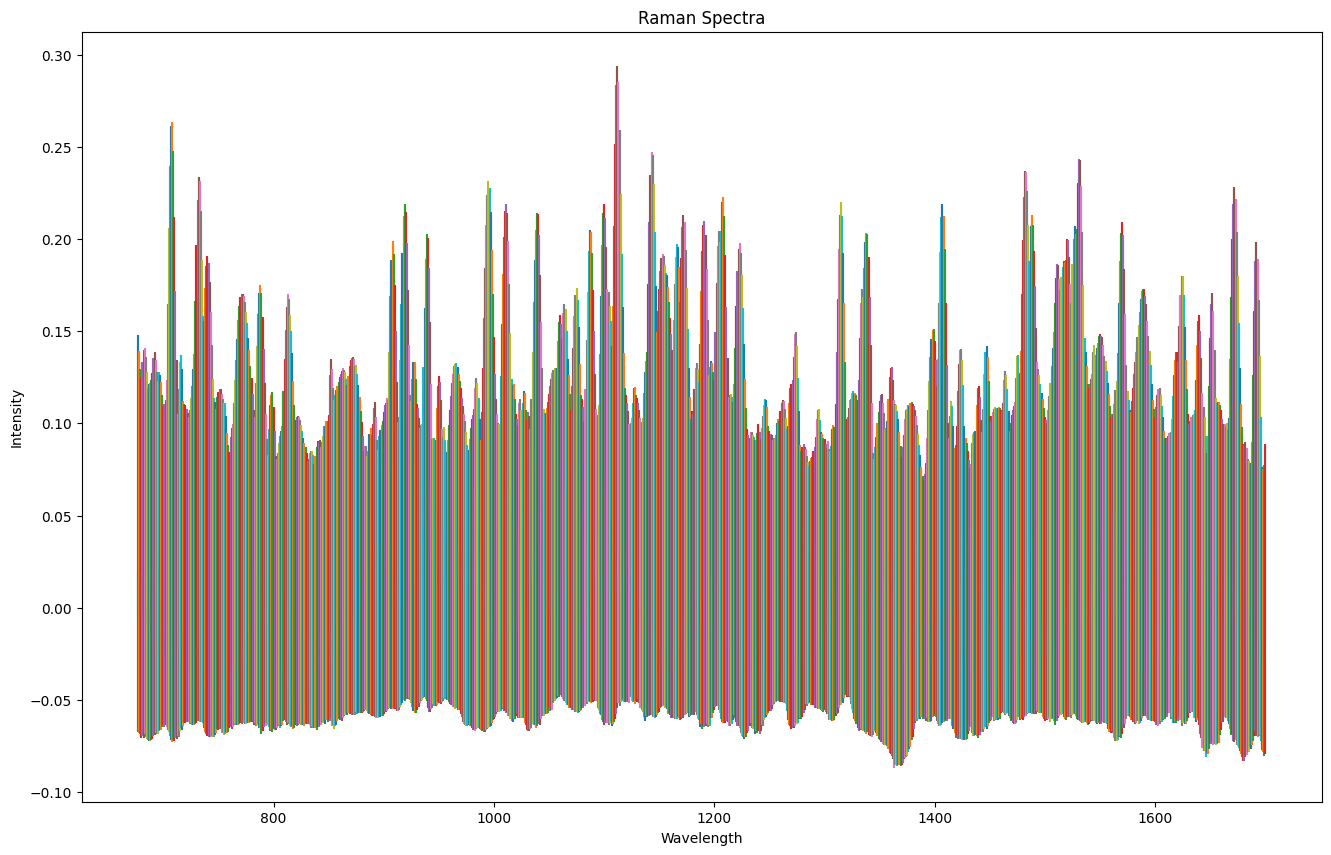

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/working/matched_data_corrected.csv')

# Parse the intensity values from the "Spectra" column
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Plot the spectra
plt.figure(figsize=(16,10))
for index, row in data.iterrows():
    wavelengths = [row['Wavelength']] * len(row['Spectra'])  # Repeat the wavelength value for each intensity value
    plt.plot(wavelengths, row['Spectra'], label=f'Sample {index}')

# Add labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Raman Spectra')
plt.show()

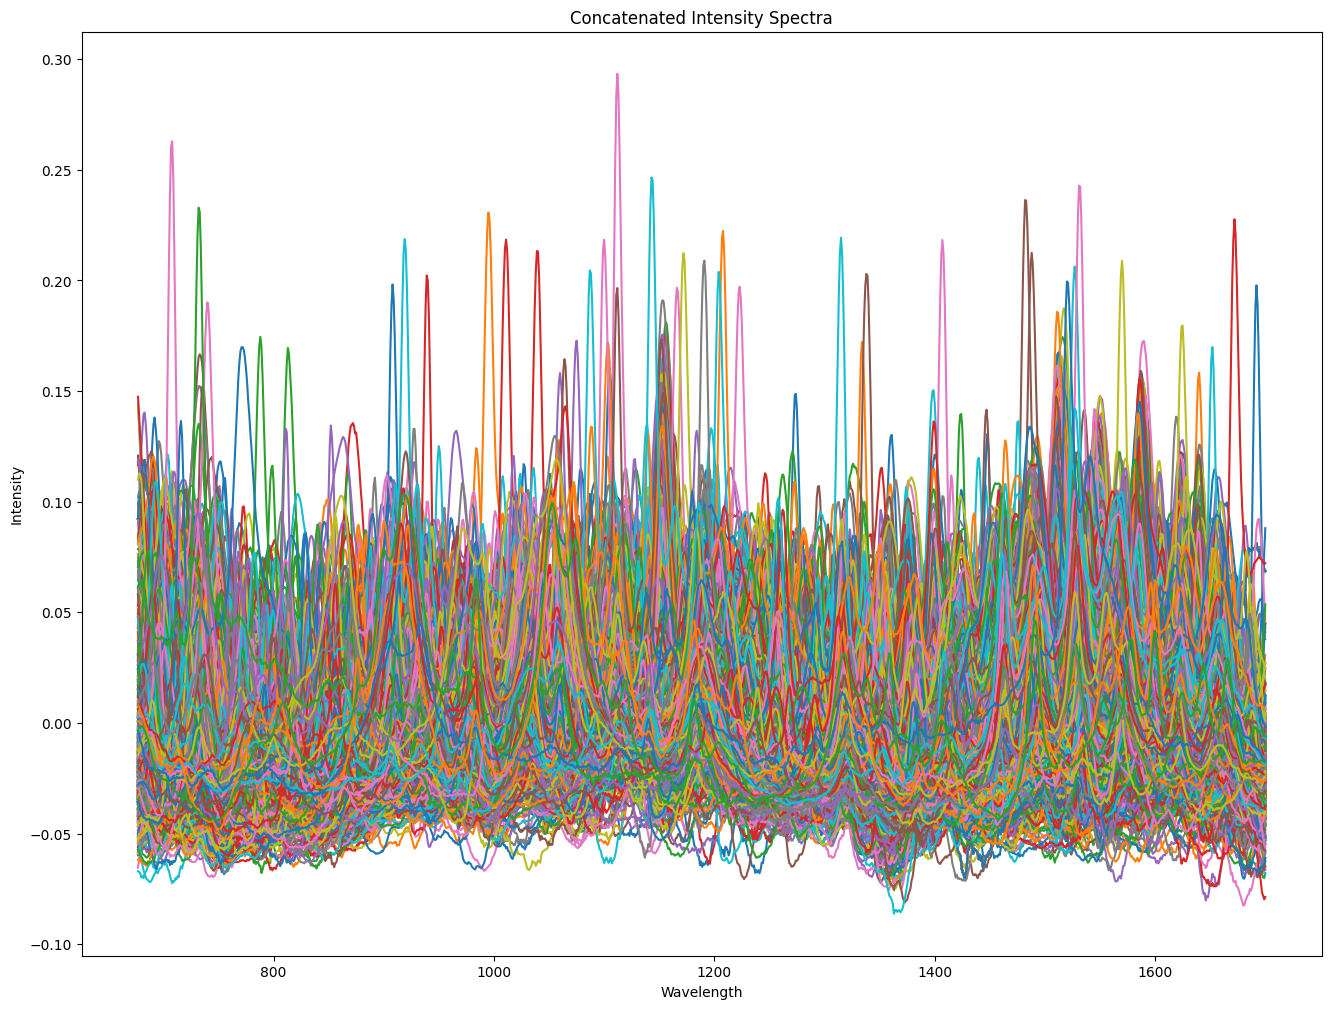

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load  data
data = pd.read_csv('/kaggle/working/matched_data_corrected.csv')

# Parse the intensity values from the "Spectra" column
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position (e.g., each index) in the spectra
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Plot the concatenated spectra
plt.figure(figsize=(16,12))
for index, spectrum in enumerate(concatenated_spectra):
    plt.plot(data['Wavelength'], spectrum, label=f'Spectrum {index}')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Concatenated Intensity Spectra')
plt.show()

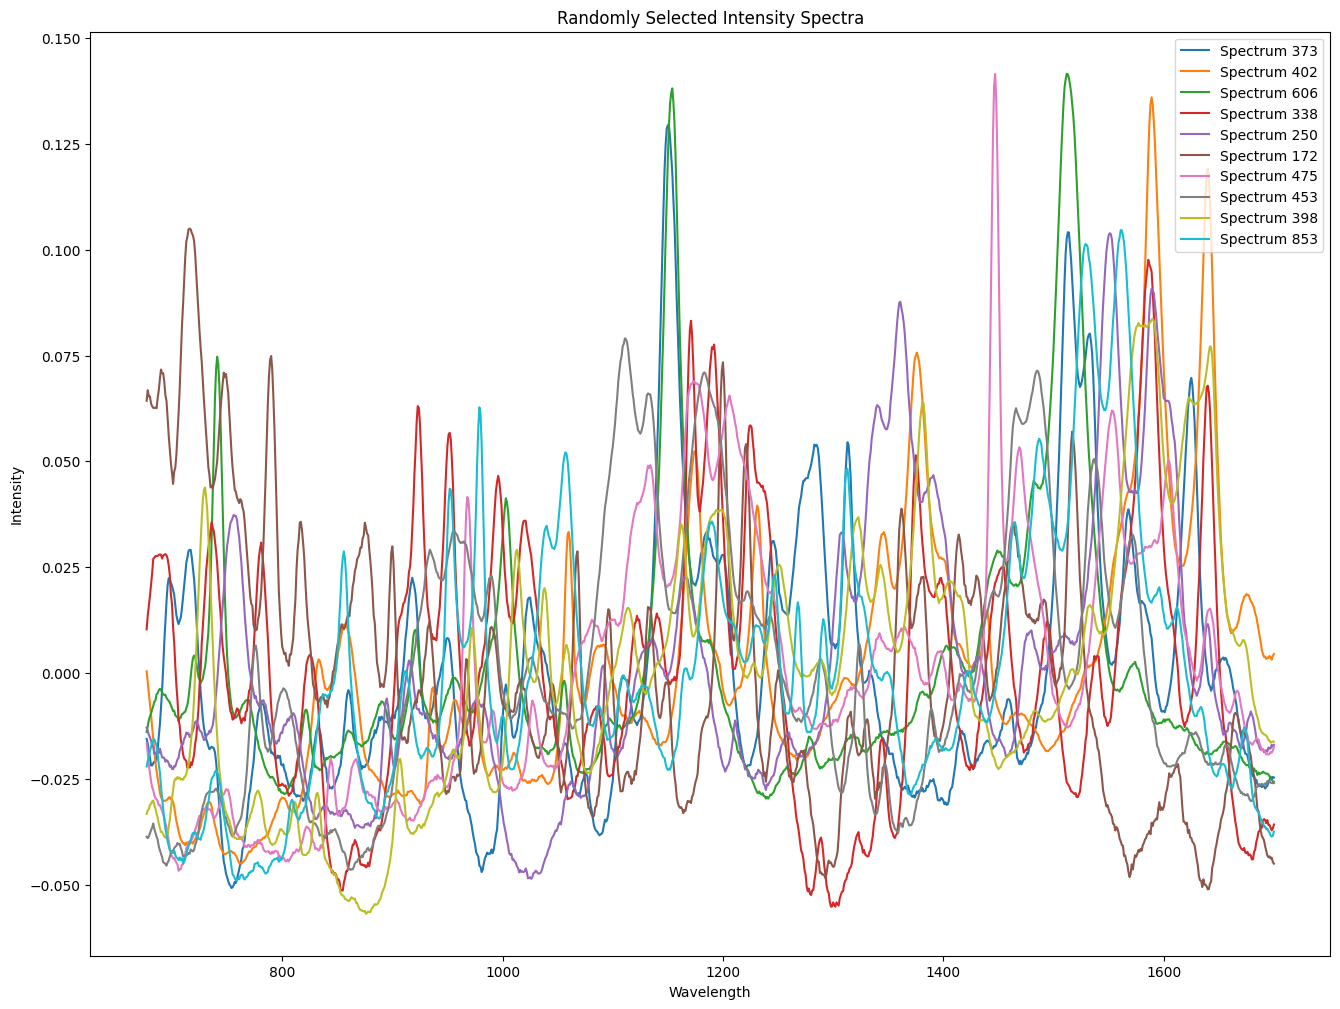

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load the data
data = pd.read_csv('/kaggle/working/matched_data_corrected.csv')

# Parse the intensity values from the "Spectra" column
data['Spectra'] = data['Spectra'].apply(lambda x: [float(val) for val in x.strip('[]').split(',')])

# Create an empty list to store concatenated spectra
concatenated_spectra = []

# Iterate over each position (e.g., each index) in the spectra
for i in range(len(data['Spectra'].iloc[0])):
    # Extract intensity values at position i from all rows
    intensity_values = [row['Spectra'][i] for index, row in data.iterrows()]
    # Append intensity values to concatenated spectra list
    concatenated_spectra.append(intensity_values)

# Randomly select 10 spectra
random_indices = random.sample(range(len(concatenated_spectra)), 10)

# Plot the randomly selected spectra
plt.figure(figsize=(16, 12))
for index in random_indices:
    plt.plot(data['Wavelength'], concatenated_spectra[index], label=f'Spectrum {index}')

# Add labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Randomly Selected Intensity Spectra')
plt.legend()

# Show the plot
plt.show()
